In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.rcParams['figure.figsize']= (20,10)

In [51]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [52]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [53]:
df.balcony = df.balcony.fillna(0.0)

In [54]:
df.dropna(subset=['size'],inplace=True)

In [55]:
def extract_int_size(size):
    int_size = size.split(" ")[0]
    return int_size

In [56]:
df['size'] = df['size'].apply(extract_int_size).astype('int')

In [57]:
#allocate bathrooms whereever null based on the size of the house
def assign_bathrooms(bath,size):
    count_bath = 0
    if bath != None:
        if size >= 5:
            count_bath = 3.0
            return count_bath
        elif size == 4 or size == 3:
            count_bath = 2.0
            return count_bath
        elif size <= 2:
            count_bath = 1.0
            return count_bath

In [58]:
df['bath'] = df.apply(lambda x: assign_bathrooms(x['bath'], x['size']), axis=1)

In [59]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,1.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,2.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,2.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,1.0,1.0,51.00


In [60]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [61]:
df.drop(['area_type','availability','society'], axis =1 , inplace=True)

In [62]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,1.0,1.0,39.07
1,Chikka Tirupathi,4,2600,2.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,2.0,1.0,95.00
4,Kothanur,2,1200,1.0,1.0,51.00


In [63]:
df.location.value_counts()

Whitefield           539
Sarjapur  Road       397
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [64]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13304 non-null  int32  
 2   total_sqft  13304 non-null  object 
 3   bath        13304 non-null  float64
 4   balcony     13304 non-null  float64
 5   price       13304 non-null  float64
dtypes: float64(3), int32(1), object(2)
memory usage: 675.6+ KB


In [66]:
df.dropna(axis=0,inplace=True)

In [67]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [68]:
df[df['size']>20]

,location,size,total_sqft,bath,balcony,price
1718,2Electronic City Phase II,27,8000,3.0,0.0,230.0
4684,Munnekollal,43,2400,3.0,0.0,660.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13303 non-null  int32  
 2   total_sqft  13303 non-null  object 
 3   bath        13303 non-null  float64
 4   balcony     13303 non-null  float64
 5   price       13303 non-null  float64
dtypes: float64(3), int32(1), object(2)
memory usage: 675.5+ KB


In [70]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [71]:
def avgTotSqft(totsqft):
    if " - " in totsqft:
        areaRangeList = totsqft.split(" - ")
        areaRange1 = float(areaRangeList[0])
        areaRange2 = float(areaRangeList[1])
        return ((areaRange1+ areaRange2)/2)
    else:
        try:
            return float(totsqft)
        except:
            return None

In [72]:
print(avgTotSqft('1133SqMeter'))

None


In [73]:
df['total_sqft'] = df['total_sqft'].apply(avgTotSqft)

In [74]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [75]:
df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price


In [76]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,1.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,2.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,2.0,1.0,95.00
4,Kothanur,2,1200.0,1.0,1.0,51.00


In [77]:
df.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13303 non-null  int32  
 2   total_sqft  13257 non-null  float64
 3   bath        13303 non-null  float64
 4   balcony     13303 non-null  float64
 5   price       13303 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 675.5+ KB


In [79]:
df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price


In [80]:
df.loc[410]

location      Kengeri
size                1
total_sqft        NaN
bath              1.0
balcony           0.0
price            18.5
Name: 410, dtype: object

In [81]:
df.dropna(subset=['total_sqft'],inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13257 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13257 non-null  object 
 1   size        13257 non-null  int32  
 2   total_sqft  13257 non-null  float64
 3   bath        13257 non-null  float64
 4   balcony     13257 non-null  float64
 5   price       13257 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 673.2+ KB


In [83]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,1.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,2.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,2.0,1.0,95.00
4,Kothanur,2,1200.0,1.0,1.0,51.00


<h2> Feature Engineering </h2>

In [84]:
df1 = df.copy()

In [85]:
df1['price_per_sqft'] = round(df1['price']*100000/df1['total_sqft'],2)
df1.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,1.0,1.0,39.07,3699.81
1,Chikka Tirupathi,4,2600.0,2.0,3.0,120.00,4615.38
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.56
3,Lingadheeranahalli,3,1521.0,2.0,1.0,95.00,6245.89
4,Kothanur,2,1200.0,1.0,1.0,51.00,4250.00


In [86]:
loc_stats = df1.location.value_counts()

In [87]:
loc_stats

Whitefield                   537
Sarjapur  Road               397
Electronic City              302
Kanakpura Road               271
Thanisandra                  233
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [88]:
len(loc_stats[loc_stats <= 10])

1058

In [89]:
loc_stats_less_than_10 = loc_stats[loc_stats <= 10]
loc_stats_less_than_10

Ganga Nagar                  10
Nagappa Reddy Layout         10
Naganathapura                10
Sadashiva Nagar              10
Basapura                     10
                             ..
Indiranagar HAL 2nd Stage     1
Maruthi HBCS Layout           1
K R C kothanur                1
1Channasandra                 1
Abshot Layout                 1
Name: location, Length: 1058, dtype: int64

In [90]:
len(df1.location.unique())

1298

In [91]:
df1.location = df1.location.apply(lambda x: 'Other' if x in loc_stats_less_than_10 else x )
len(df1.location.unique())

241

In [92]:
df1.tail()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
13315,Whitefield,5,3453.0,3.0,0.0,231.0,6689.83
13316,Other,4,3600.0,2.0,0.0,400.0,11111.11
13317,Raja Rajeshwari Nagar,2,1141.0,1.0,1.0,60.0,5258.55
13318,Padmanabhanagar,4,4689.0,2.0,1.0,488.0,10407.34
13319,Doddathoguru,1,550.0,1.0,1.0,17.0,3090.91


In [93]:
df1[df1['location'] == 'Other'].head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
9,Other,6,1020.0,3.0,0.0,370.00,36274.51
18,Other,3,2770.0,2.0,2.0,290.00,10469.31
19,Other,2,1100.0,1.0,2.0,48.00,4363.64
24,Other,1,510.0,1.0,0.0,25.25,4950.98
25,Other,3,1250.0,2.0,2.0,56.00,4480.00


<h1>Detecting corrupt data and outliers</h1>

In [94]:
df1[df1['total_sqft']/df1['size'] < 300].head()  ## assuming that each bedroom is of minimum 300 sqft area

,location,size,total_sqft,bath,balcony,price,price_per_sqft
9,Other,6,1020.0,3.0,0.0,370.0,36274.51
45,HSR Layout,8,600.0,3.0,0.0,200.0,33333.33
58,Murugeshpalya,6,1407.0,3.0,1.0,150.0,10660.98
68,Other,8,1350.0,3.0,0.0,85.0,6296.30
70,Other,3,500.0,2.0,2.0,100.0,20000.00


In [95]:
df1.shape

(13257, 7)

In [96]:
df2 = df1[~(df1['total_sqft']/df1['size'] < 300)]
df2.shape

(12513, 7)

In [97]:
## finding the min and max of price_per_sqft area and removing the extreme values
df2.price_per_sqft.describe()

count     12513.000000
mean       6307.441655
std        4160.931637
min         267.830000
25%        4210.530000
50%        5295.010000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

<h1 style="background-color:yellow">Trial and Error</h1>

In [111]:
loc_grp = pd.DataFrame()
loc_grp = df2.groupby('location')
loc_grp

In [112]:
pp_sqft_mean = df2.price_per_sqft.mean()
pp_sqft_std = df2.price_per_sqft.std()

In [113]:
pp_sqft_mean

6307.44165507869

In [119]:
ind = df2.index[df2['location'] == 'Electronic City Phase II'].tolist()
tot = 0
for i in ind:
    tot = tot + df2.loc[i,"price_per_sqft"]
mean = tot/len(ind)
print(mean)

3834.1722047244084


In [134]:
loc_names = df2.location.unique()


In [147]:
df_out = pd.DataFrame()
for loc in loc_names:
    ind = df2.index[df2['location'] == loc].tolist()
    tot = 0
    listloc = []
    for i in ind:
        tot = tot + df2.loc[i,"price_per_sqft"]
        listloc.append(df2.loc[i,"price_per_sqft"])
    mean = tot/len(ind)
    stddev = np.std(listloc)
    red_df = df2[(df2['price_per_sqft'] > (mean - 1 * stddev)) & (df2['price_per_sqft'] <= (mean + 1 * stddev))]
    #print(red_df)
    df_out = pd.concat([df_out,red_df], ignore_index=True)
df_out.head()
#     print("mean", mean)
#     print("stddev", stddev)

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,1.0,1.0,39.07,3699.81
1,Chikka Tirupathi,4,2600.0,2.0,3.0,120.00,4615.38
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.56
3,Kothanur,2,1200.0,1.0,1.0,51.00,4250.00
4,Whitefield,2,1170.0,1.0,1.0,38.00,3247.86


In [131]:
df_out.shape

(1565240, 7)

In [142]:
df2.groupby('location')['price_per_sqft'].sum()

location
 Devarachikkanahalli           69578.68
1st Block Jayanagar           123592.53
1st Phase JP Nagar            223707.33
2nd Phase Judicial Layout      44535.72
2nd Stage Nagarbhavi          129431.48
                                ...    
Yelachenahalli                108177.58
Yelahanka                    1076092.21
Yelahanka New Town            222705.06
Yelenahalli                    52163.16
Yeshwanthpur                  529643.54
Name: price_per_sqft, Length: 241, dtype: float64

In [145]:
(df2.groupby('location')['price_per_sqft'].sum() > (mean - 1 * stddev)) & (df2.groupby('location')['price_per_sqft'].sum() <= (mean + 1 * stddev))

location
 Devarachikkanahalli         False
1st Block Jayanagar          False
1st Phase JP Nagar           False
2nd Phase Judicial Layout    False
2nd Stage Nagarbhavi         False
                             ...  
Yelachenahalli               False
Yelahanka                    False
Yelahanka New Town           False
Yelenahalli                  False
Yeshwanthpur                 False
Name: price_per_sqft, Length: 241, dtype: bool

In [102]:
df2[(df2['price_per_sqft'] > (pp_sqft_mean - 1 * pp_sqft_std)) & (df2['price_per_sqft'] <= (pp_sqft_mean + 1 * pp_sqft_std))]

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,1.0,1.0,39.07,3699.81
1,Chikka Tirupathi,4,2600.0,2.0,3.0,120.00,4615.38
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.56
3,Lingadheeranahalli,3,1521.0,2.0,1.0,95.00,6245.89
4,Kothanur,2,1200.0,1.0,1.0,51.00,4250.00
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,2.0,3.0,112.00,6530.61
13315,Whitefield,5,3453.0,3.0,0.0,231.00,6689.83
13317,Raja Rajeshwari Nagar,2,1141.0,1.0,1.0,60.00,5258.55
13318,Padmanabhanagar,4,4689.0,2.0,1.0,488.00,10407.34


<h1 style="background-color:yellow"></h1>

In [161]:
def rem_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        red_df = subdf[(subdf['price_per_sqft']> (m-std)) & (subdf['price_per_sqft']<= (m+std))]
        df_out= pd.concat([df_out,red_df],ignore_index=True)
    return df_out

df3 = rem_outliers(df2)
df3.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Devarachikkanahalli,3,1250.0,2.0,3.0,44.0,3520.00
1,Devarachikkanahalli,2,1250.0,1.0,2.0,40.0,3200.00
2,Devarachikkanahalli,2,1200.0,1.0,2.0,83.0,6916.67
3,Devarachikkanahalli,2,1170.0,1.0,2.0,40.0,3418.80
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0,4561.40


In [153]:
df3.shape

(10290, 7)

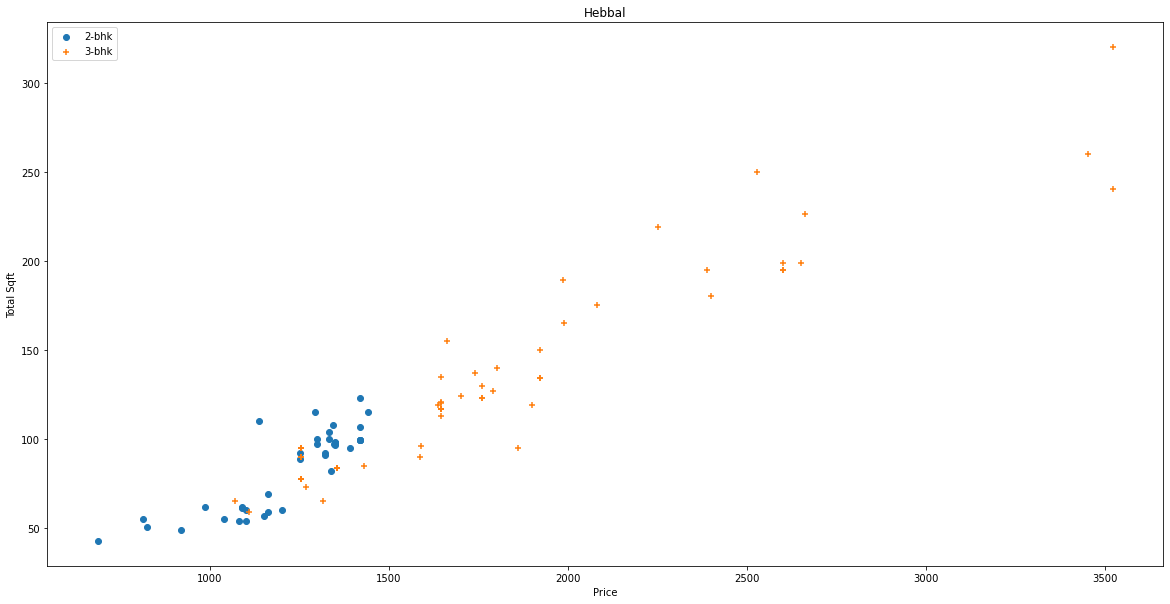

In [171]:
def scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['size'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['size'] == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,label='2-bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',label='3-bhk')
    plt.title(location)
    plt.xlabel("Price")
    plt.ylabel("Total Sqft")
    plt.legend()

scatter_chart(df3,'Hebbal')

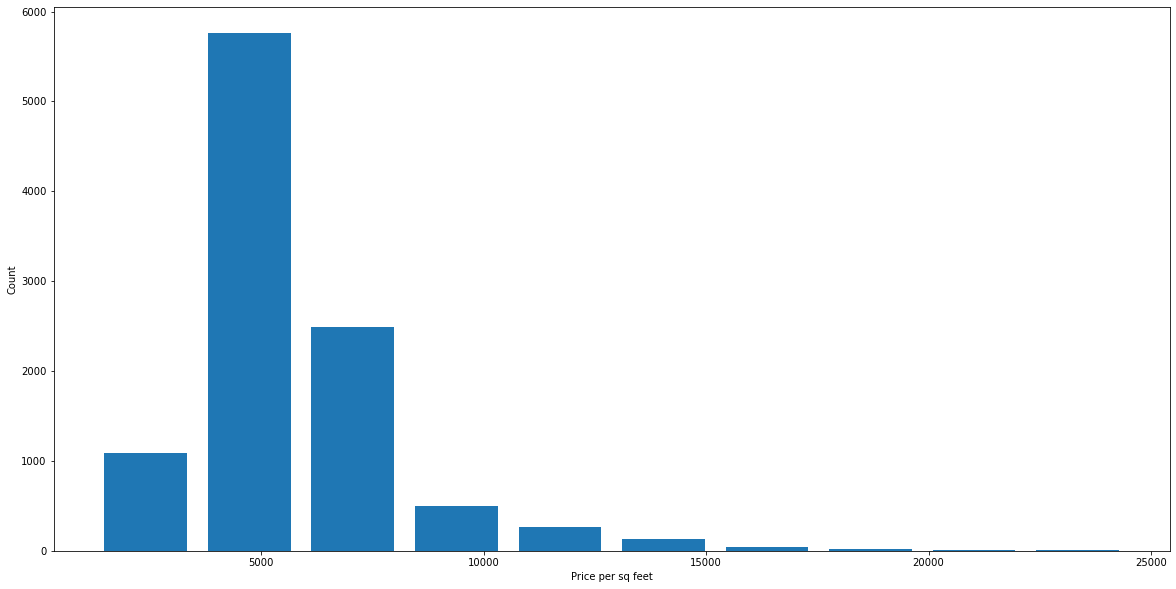

In [174]:
plt.hist(df3.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price per sq feet')
plt.ylabel('Count')
plt.show()

<h1> Model Building </h1>

In [175]:
df3.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Devarachikkanahalli,3,1250.0,2.0,3.0,44.0,3520.00
1,Devarachikkanahalli,2,1250.0,1.0,2.0,40.0,3200.00
2,Devarachikkanahalli,2,1200.0,1.0,2.0,83.0,6916.67
3,Devarachikkanahalli,2,1170.0,1.0,2.0,40.0,3418.80
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0,4561.40


In [177]:
df4 = df3.drop(['price_per_sqft'], axis =1)
df4.head()

,location,size,total_sqft,bath,balcony,price
0,Devarachikkanahalli,3,1250.0,2.0,3.0,44.0
1,Devarachikkanahalli,2,1250.0,1.0,2.0,40.0
2,Devarachikkanahalli,2,1200.0,1.0,2.0,83.0
3,Devarachikkanahalli,2,1170.0,1.0,2.0,40.0
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0


In [178]:
dummies = pd.get_dummies(df4.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [187]:
df5_wid_dummies = pd.concat([df4, dummies], axis =1)
df5_wid_dummies.head()

,location,size,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,3,1250.0,2.0,3.0,44.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,2,1250.0,1.0,2.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2,1200.0,1.0,2.0,83.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2,1170.0,1.0,2.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
df5_wid_dummies.drop('location', axis=1, inplace=True)
df5_wid_dummies.head()

,size,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,1250.0,2.0,3.0,44.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1250.0,1.0,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,1.0,2.0,83.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,1.0,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,2.0,65.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
df6_le = df4.copy()
le = LabelEncoder()
df6_le['location'] = le.fit_transform(df4.location)
df6_le.tail(5)

,location,size,total_sqft,bath,balcony,price
10285,240,3,1676.0,2.0,0.0,92.13
10286,240,3,2503.0,2.0,3.0,138.00
10287,240,3,1855.0,2.0,3.0,135.00
10288,240,3,1876.0,2.0,3.0,160.00
10289,240,3,1675.0,2.0,0.0,92.13


In [194]:
df6_le.shape

(10290, 6)

In [198]:
X = df5_wid_dummies.drop('price', axis =1)
Y = df5_wid_dummies['price']

In [220]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

In [200]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2, random_state= 40)

In [207]:
lr_mod = LinearRegression()
lr_mod.fit(x_train,y_train)
lr_mod.score(x_test,y_test)

0.8309479823920951

In [218]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
val = cross_val_score(LinearRegression(), X, Y, cv=cv)
print(val)
avg_score = sum(val)/5
print(avg_score)

[0.77993653 0.760618   0.76858366 0.7687913  0.86625492]
0.7888368838476609


In [221]:
def find_best_model_using_grid_search(X,Y):
    algos = {
        'lin_reg':{
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'dec_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse', 'friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [222]:
find_best_model_using_grid_search(X,Y)

,model,best_score,best_params
0,lin_reg,0.788847,{'normalize': True}
1,lasso,0.645044,"{'alpha': 1, 'selection': 'cyclic'}"
2,dec_tree,0.710479,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [223]:
Xd = df6_le.drop('price', axis =1)
Yd = df6_le['price']

In [224]:
find_best_model_using_grid_search(Xd,Yd)

,model,best_score,best_params
0,lin_reg,0.642694,{'normalize': True}
1,lasso,0.641526,"{'alpha': 2, 'selection': 'cyclic'}"
2,dec_tree,0.530712,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [226]:
X.columns

Index(['size', 'total_sqft', 'bath', 'balcony', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [240]:
def predict_price(loc,sqft,bath,bhk,balcony):
    loc_index = np.where(X.columns==loc)[0][0]
    #loc_index1 = np.where(X.columns==loc)[0]
    #print("loc index", loc_index)
    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_mod.predict([x])[0]

    

In [241]:
predict_price('1st Phase JP Nagar',1000,3,3,2)

90.62631774050764

In [242]:
predict_price('Indira Nagar',1000,2,2,1)

176.18446164454735

In [243]:
import pickle
fp = open("house_price_pred.pkl","wb")
pickle.dump(lr_mod,fp)
fp.close()

In [246]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
fp1 = open("cols.json","w")
fp1.write(json.dumps(columns))
fp1.close()